# **Kodcell 1: Installera YOLOv5 och beroenden**

In [9]:
# Klona YOLOv5-repository
!git clone https://github.com/ultralytics/yolov5.git /workspace/yolov5
%cd /workspace/yolov5

# Installera beroenden
!pip install -r requirements.txt

fatal: destination path '/workspace/yolov5' already exists and is not an empty directory.
/workspace/yolov5

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


# **Kodcell 2: Ladda dataset**

In [10]:
import os

# Skapa dataset-katalog
dataset_dir = "/workspace/datasets/coco128"
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)
    print(f"Katalog skapad: {dataset_dir}")
else:
    print(f"Katalog existerar: {dataset_dir}")

# Installera unzip om det saknas
try:
    print("Kontrollerar och installerar 'unzip' om det behövs...")
    !apt-get update && apt-get install -y unzip
except Exception as e:
    print(f"Fel vid installation av 'unzip': {e}")

# Ladda COCO128-dataset
try:
    print("Laddar COCO128-dataset...")
    !curl -L "https://ultralytics.com/assets/coco128.zip" -o coco128.zip
    !unzip -qo coco128.zip -d /workspace/datasets/
    print("COCO128 har laddats och packats upp.")
except Exception as e:
    print(f"Fel vid nedladdning eller uppackning: {e}")

# Kontrollera filstruktur
print("Kontrollerar filstruktur...")
if os.path.exists("/workspace/datasets/coco128/images/train2017") and os.path.exists("/workspace/datasets/coco128/labels/train2017"):
    print("Datasetets struktur är korrekt.")
else:
    print("Datasetets struktur saknas eller är inkorrekt!")
    raise Exception("Kontrollera datasetets nedladdning och struktur.")

Katalog existerar: /workspace/datasets/coco128
Kontrollerar och installerar 'unzip' om det behövs...
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease                 
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease               
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease   
Fetched 129 kB in 1s (101 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
Laddar COCO128-dataset...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                              

# **Kodcell 3: Skapa och verifiera dataset.yaml**

In [11]:
import os
import sys

# Lägg till YOLOv5 till sys.path
yolov5_path = "/workspace/yolov5"
if yolov5_path not in sys.path:
    sys.path.append(yolov5_path)

# Skapa dataset.yaml för COCO128
dataset_yaml = """
path: /workspace/datasets/coco128
train: images/train2017
val: images/train2017
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush
"""

# Spara dataset.yaml
yaml_path = 'dataset.yaml'
with open(yaml_path, 'w') as f:
    f.write(dataset_yaml)
print(f"dataset.yaml har skapats: {yaml_path}")

# Verifiera dataset.yaml
try:
    from utils.general import check_dataset

    data_dict = check_dataset(yaml_path)  # Kontrollera YAML-konfiguration
    print("Dataset verifierat:", data_dict)
except Exception as e:
    print(f"Fel vid verifiering av dataset.yaml: {e}")

dataset.yaml har skapats: dataset.yaml
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 755k/755k [00:00<00:00, 27.5MB/s]

Dataset verifierat: {'path': '/workspace/datasets/coco128', 'train': '/workspace/datasets/coco128/images/train2017', 'val': '/workspace/datasets/coco128/images/train2017', 'names': {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'c

# **Kodcell 4: Initialisering och inställningar**

In [13]:
import os
import torch
from ultralytics import YOLO
import sys

# Lägg till YOLOv5-katalog till sys.path
yolov5_path = "/workspace/yolov5"
if yolov5_path not in sys.path:
    sys.path.append(yolov5_path)

# Importera verktyg från YOLOv5
try:
    from utils.general import check_dataset
except ModuleNotFoundError as e:
    print(f"❌ Kunde inte importera 'check_dataset': {e}")
    print(f"Verifiera att katalogen {yolov5_path} innehåller rätt filer.")
    raise e


def print_section(title, symbol="="):
    """Hjälpfunktion för att skapa snyggare sektioner i loggar."""
    print(f"\n{symbol * 60}")
    print(f"{title:^60}")  # Centrerad titel
    print(f"{symbol * 60}")


def log_message(msg, symbol="ℹ️"):
    """Hjälpfunktion för att logga med symboler."""
    print(f"{symbol} {msg}")


def validate_settings(settings):
    """Validera träningsinställningar och logga dessa."""
    log_message("Validerar inställningar...", symbol="🛠️")
    for key, value in settings.items():
        log_message(f"{key}: {value}", symbol="✔️")
    print()


# Kontrollera och skapa nödvändiga mappar
output_dir = "/workspace/my_project"
os.makedirs(output_dir, exist_ok=True)  # Skapa mappen om den inte redan finns

settings = {
    "Bildstorlek": 640,
    "Batchstorlek": 16,
    "Antal Epochs (Test)": 1,
    "Vikter": "yolov5s.pt",
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

try:
    # Validera inställningar
    print_section("Systemkontroll")
    log_message(f"Använder enhet: {device}", symbol="✅")
    validate_settings(settings)

    # Verifiera dataset.yaml
    print_section("Verifierar dataset.yaml")
    try:
        check_dataset("dataset.yaml")  # Kontrollera YAML-filen
        log_message("dataset.yaml verifierad.", symbol="✅")
    except Exception as e:
        print(f"❌ Fel vid verifiering av dataset.yaml: {e}")
        raise e

    # Ladda modellen
    print_section("Laddar YOLO-modellen")
    model = YOLO(settings["Vikter"])
    log_message("Modell laddad.", symbol="✅")

    # Kör en testkörning
    print_section("Kör testkörning")
    test_run_name = "test_run"
    model.train(
        data="dataset.yaml",
        imgsz=settings["Bildstorlek"],
        batch=settings["Batchstorlek"],
        epochs=settings["Antal Epochs (Test)"],
        device=device,
        workers=4,
        project=output_dir,
        name=test_run_name,
        verbose=True,
        optimizer="AdamW",
    )
    log_message("Testkörning slutförd.", symbol="✅")

    # Kontrollera resultat från testkörningen
    print_section("Resultat från testkörning")
    results_dir = os.path.join(output_dir, test_run_name, "weights")
    last_model = os.path.join(results_dir, "last.pt")
    best_model = os.path.join(results_dir, "best.pt")
    log_message(f"Modellen efter sista epoken sparad som: {last_model}", symbol="🟢")
    log_message(f"Den bästa modellen sparad som: {best_model}", symbol="🟢")

except Exception as e:
    print(f"❌ Ett oväntat fel uppstod: {e}")


                       Systemkontroll                       
✅ Använder enhet: cuda
🛠️ Validerar inställningar...
✔️ Bildstorlek: 640
✔️ Batchstorlek: 16
✔️ Antal Epochs (Test): 1
✔️ Vikter: yolov5s.pt


                  Verifierar dataset.yaml                   
✅ dataset.yaml verifierad.

                    Laddar YOLO-modellen                    
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 150MB/s]


✅ Modell laddad.

                      Kör testkörning                       
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=dataset.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=/workspace/my_project, name=test_run, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 5.35M/5.35M [00:00<00:00, 93.8MB/s]


AMP: checks passed ✅


train: Scanning /workspace/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 540.45it/s]


train: New cache created: /workspace/datasets/coco128/labels/train2017.cache


val: Scanning /workspace/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to /workspace/my_project/test_run/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /workspace/my_project/test_run
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      4.15G      1.278      1.897      1.275        196        640: 100%|██████████| 8/8 [00:01<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.05it/s]


                   all        128        929      0.467      0.125     0.0835     0.0461

1 epochs completed in 0.003 hours.
Optimizer stripped from /workspace/my_project/test_run/weights/last.pt, 18.6MB
Optimizer stripped from /workspace/my_project/test_run/weights/best.pt, 18.6MB

Validating /workspace/my_project/test_run/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24154MiB)
YOLOv5s summary (fused): 193 layers, 9,142,496 parameters, 0 gradients, 24.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


                   all        128        929      0.442      0.134     0.0842     0.0458
                person         61        254      0.507     0.0512      0.104     0.0453
               bicycle          3          6          0          0    0.00664    0.00133
                   car         12         46          1          0     0.0278     0.0251
            motorcycle          4          5          1          0     0.0332     0.0133
              airplane          5          6          1          0          0          0
                   bus          5          7          0          0        0.1       0.02
                 train          3          3          0          0          0          0
                 truck          5         12          1          0          0          0
                  boat          2          6          1          0          0          0
         traffic light          4         14          1          0          0          0
             stop sig

# **Kodcell 5: Anpassad träningsloop**

In [26]:
import os
import time
import torch
import logging
import json
from ultralytics import YOLO
from datetime import datetime
import argparse
import sys


def setup_logging(output_dir):
    """Sätter upp loggning för både konsol och fil."""
    log_file = os.path.join(output_dir, "training.log")
    logging.basicConfig(
        level=logging.INFO,
        format="%(asctime)s - %(levelname)s - [%(filename)s:%(lineno)d] - %(message)s",
        handlers=[
            logging.StreamHandler(),
            logging.FileHandler(log_file)
        ]
    )


def print_section(title):
    """Skriver ut en tydlig sektionstitel i loggen."""
    logging.info("\n" + "=" * 60)
    logging.info(f"{title:^60}")
    logging.info("=" * 60)


def validate_settings(settings):
    """Validerar och loggar träningsinställningar."""
    print_section("Validerar inställningar")
    for key, value in settings.items():
        logging.info(f"✔️ {key}: {value}")
    if settings["Batchstorlek"] <= 0 or settings["Bildstorlek"] <= 0:
        raise ValueError("Batchstorlek och Bildstorlek måste vara positiva heltal.")
    if settings["Antal Epochs"] <= 0:
        raise ValueError("Antal Epochs måste vara större än noll.")


def save_params_to_json(settings, output_dir):
    """Sparar alla inställningar i en params.json-fil."""
    params_path = os.path.join(output_dir, "params.json")
    with open(params_path, "w") as f:
        json.dump(settings, f, indent=4)
    logging.info(f"📂 Träningsparametrar sparade i {params_path}")


def save_metrics_to_json(metrics, output_dir):
    """Sparar träningsresultat i en metrics.json-fil."""
    metrics_path = os.path.join(output_dir, "metrics.json")
    with open(metrics_path, "w") as f:
        json.dump(metrics, f, indent=4)
    logging.info(f"📂 Träningsresultat sparade i {metrics_path}")


def check_dataset(datafile):
    """Kontrollerar om datasetfilen existerar och är korrekt."""
    if not os.path.isfile(datafile):
        logging.error(f"❌ Datasetfilen {datafile} hittades inte. Kontrollera filens placering.")
        raise FileNotFoundError(f"Datasetfilen {datafile} saknas.")
    logging.info(f"✅ Datasetfilen {datafile} validerad.")


def check_directory(path):
    """Kontrollerar och skapar en mapp om den saknas."""
    if not os.path.exists(path):
        os.makedirs(path)
        logging.info(f"📁 Mappen {path} skapades.")
    else:
        logging.info(f"📁 Mappen {path} existerar redan.")


def log_training_summary(start_time, output_dir, training_name, results):
    """Loggar en sammanfattning av träningen."""
    elapsed_time = time.time() - start_time
    best_model_path = os.path.join(output_dir, training_name, "weights", "best.pt")
    last_model_path = os.path.join(output_dir, training_name, "weights", "last.pt")

    print_section("Träning klar!")
    logging.info(f"🕒 Starttid: {datetime.fromtimestamp(start_time).strftime('%Y-%m-%d %H:%M:%S')}")
    logging.info(f"🕒 Sluttid: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    logging.info(f"✅ Träning slutförd på {elapsed_time / 60:.2f} minuter.")
    logging.info(f"📈 Bästa viktfil sparad som: {best_model_path}")
    logging.info(f"📝 Sista viktfil sparad som: {last_model_path}")

    if results and hasattr(results, "metrics"):
        metrics = results.metrics
        logging.info(f"📊 Precision (P): {metrics.get('P', 'N/A')}")
        logging.info(f"📊 Recall (R): {metrics.get('R', 'N/A')}")
        logging.info(f"📊 mAP50: {metrics.get('mAP50', 'N/A')}")
        logging.info(f"📊 mAP50-95: {metrics.get('mAP50-95', 'N/A')}")


def export_to_onnx(model, output_dir):
    """Exporterar modellen till ONNX-format."""
    try:
        logging.info("🚀 Exporterar modellen till ONNX...")
        model_path = os.path.join(output_dir, "model.onnx")
        model.export(format="onnx", dynamic=True, simplify=True)
        logging.info(f"✅ Modellen exporterades framgångsrikt till {model_path}")
    except Exception as e:
        logging.error(f"❌ Ett fel uppstod vid ONNX-export: {e}")
        raise


def parse_arguments():
    """Hanterar kommandoradsargument och ignorerar orelaterade argument i Jupyter Notebook."""
    parser = argparse.ArgumentParser(description="YOLO Training Script")
    parser.add_argument("--datafile", type=str, default="dataset.yaml", help="Dataset YAML-fil")
    parser.add_argument("--epochs", type=int, default=50, help="Antal träningscykler")
    parser.add_argument("--batch_size", type=int, default=16, help="Batchstorlek")
    parser.add_argument("--img_size", type=int, default=640, help="Bildstorlek")
    parser.add_argument("--learning_rate", type=float, default=0.001, help="Startvärde för lärandefrekvens")
    parser.add_argument("--model", type=str, default="yolov5s.pt", help="Modell att använda")
    parser.add_argument("--output_dir", type=str, default="/workspace/my_project", help="Sparningsmapp")

    # Hantera Jupyter/Colab-specifika argument
    if "--" in sys.argv:
        args = parser.parse_args(sys.argv[sys.argv.index("--") + 1:])
    else:
        args = parser.parse_args([])
    return args


# Huvudlogik
if __name__ == "__main__":
    args = parse_arguments()

    # Inställningar
    settings = {
        "Bildstorlek": args.img_size,
        "Batchstorlek": args.batch_size,
        "Antal Epochs": args.epochs,
        "Optimerare": "AdamW",
        "Lärandefrekvens": args.learning_rate,
        "Datafil": args.datafile,
        "Modell": args.model,
        "OutputDir": args.output_dir,
    }

    # Kontrollera och skapa nödvändiga mappar
    training_output_dir = os.path.join(args.output_dir, "final_training")
    check_directory(training_output_dir)
    setup_logging(training_output_dir)
    validate_settings(settings)
    save_params_to_json(settings, training_output_dir)

    # Validera dataset
    check_dataset(settings["Datafil"])

    # Ladda YOLO-modellen
    print_section("Laddar YOLO-modellen")
    try:
        model = YOLO(settings["Modell"])
        logging.info("✅ Modell laddad.")
    except Exception as e:
        logging.error(f"❌ Fel vid modelladdning: {e}")
        raise

    # Starta träningsprocessen
    print_section("Startar riktig träning...")
    start_time = time.time()
    try:
        results = model.train(
            data=settings["Datafil"],
            imgsz=settings["Bildstorlek"],
            epochs=settings["Antal Epochs"],
            batch=settings["Batchstorlek"],
            device="cuda" if torch.cuda.is_available() else "cpu",
            project=args.output_dir,
            name="final_training",
            optimizer=settings["Optimerare"],
            lr0=settings["Lärandefrekvens"],
            val=True,
        )
        log_training_summary(start_time, args.output_dir, "final_training", results)
        save_metrics_to_json(results.metrics if hasattr(results, "metrics") else {}, training_output_dir)
    except Exception as e:
        logging.error(f"❌ Fel under träning: {e}")
        raise

    # Exportera modellen till ONNX
    try:
        export_to_onnx(model, training_output_dir)
    except Exception as e:
        logging.error(f"❌ ONNX-export misslyckades: {e}")
    

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.31 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24154MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/workspace/my_project, name=final_training6, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=Fals

train: Scanning /workspace/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
val: Scanning /workspace/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to /workspace/my_project/final_training6/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /workspace/my_project/final_training6
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       4.3G       1.19      1.567      1.256        217        640: 100%|██████████| 8/8 [02:01<00:00, 15.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]

                   all        128        929       0.57      0.183      0.222       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.37G      1.273      1.612      1.241        218        640: 100%|██████████| 8/8 [00:01<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        128        929      0.456      0.146      0.121     0.0632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.48G      1.235      1.492      1.275        215        640: 100%|██████████| 8/8 [00:01<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        128        929       0.58      0.196       0.21      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.28G      1.211      1.396      1.226        148        640: 100%|██████████| 8/8 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]

                   all        128        929      0.532      0.233      0.221      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.26G      1.184      1.338      1.231        240        640: 100%|██████████| 8/8 [00:00<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.37it/s]

                   all        128        929      0.704      0.162      0.236      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.32G      1.228       1.35      1.219        187        640: 100%|██████████| 8/8 [00:00<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.46it/s]


                   all        128        929      0.537      0.343      0.358      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.26G      1.233      1.357       1.23        164        640: 100%|██████████| 8/8 [00:00<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]


                   all        128        929      0.691      0.362      0.458      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.33G      1.192      1.319      1.218        269        640: 100%|██████████| 8/8 [00:00<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]


                   all        128        929      0.693       0.49      0.562       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.24G       1.19      1.341      1.233        166        640: 100%|██████████| 8/8 [00:00<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.61it/s]


                   all        128        929      0.633      0.549      0.588      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.47G      1.171      1.292      1.243        187        640: 100%|██████████| 8/8 [00:00<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.32G      1.192      1.288      1.224        194        640: 100%|██████████| 8/8 [00:00<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]


                   all        128        929      0.677      0.555      0.635      0.431

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.48G      1.162      1.204       1.19        202        640: 100%|██████████| 8/8 [00:00<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        128        929      0.748      0.579      0.678      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.44G      1.164      1.207      1.202        276        640: 100%|██████████| 8/8 [00:00<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        128        929      0.699      0.593      0.683      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.41G      1.163      1.234      1.199        213        640: 100%|██████████| 8/8 [00:00<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]


                   all        128        929      0.751      0.581      0.707      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.39G      1.074       1.11      1.152        266        640: 100%|██████████| 8/8 [00:00<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]


                   all        128        929       0.75      0.618      0.732      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.49G       1.12      1.162      1.183        148        640: 100%|██████████| 8/8 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]

                   all        128        929      0.682      0.672      0.731      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.42G      1.083      1.112      1.157        212        640: 100%|██████████| 8/8 [00:01<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]

                   all        128        929      0.732      0.691      0.766      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.39G      1.105      1.094      1.193        131        640: 100%|██████████| 8/8 [00:01<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all        128        929      0.749      0.678      0.778      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.48G      1.063      1.063      1.153        162        640: 100%|██████████| 8/8 [00:00<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]

                   all        128        929      0.695      0.716      0.789      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       4.4G      1.049      1.008       1.14        236        640: 100%|██████████| 8/8 [00:00<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.49it/s]

                   all        128        929      0.719      0.769      0.821      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.41G      1.055      1.024      1.158        188        640: 100%|██████████| 8/8 [00:00<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all        128        929       0.78      0.743      0.826      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.42G      1.075       1.01      1.167        189        640: 100%|██████████| 8/8 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.23it/s]

                   all        128        929      0.829      0.721      0.831      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.43G      1.092      1.031      1.182        221        640: 100%|██████████| 8/8 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.29it/s]

                   all        128        929      0.823      0.739      0.833      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.49G     0.9898     0.9397      1.121        211        640: 100%|██████████| 8/8 [00:00<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.36it/s]

                   all        128        929      0.813      0.769      0.848      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.46G      1.043     0.9802      1.146        311        640: 100%|██████████| 8/8 [00:00<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]

                   all        128        929      0.786      0.789      0.845      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.38G      1.025     0.9412       1.13        172        640: 100%|██████████| 8/8 [00:00<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.53it/s]

                   all        128        929        0.8      0.789      0.863      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.41G     0.9849      0.888      1.116        212        640: 100%|██████████| 8/8 [00:00<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.28it/s]

                   all        128        929      0.851      0.774      0.866      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.43G     0.9765     0.9114       1.12        236        640: 100%|██████████| 8/8 [00:00<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.30it/s]

                   all        128        929      0.857      0.783      0.874      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.47G     0.9815     0.8764      1.092        206        640: 100%|██████████| 8/8 [00:00<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.25it/s]

                   all        128        929      0.813      0.829      0.883      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.44G     0.9253     0.8336      1.084        208        640: 100%|██████████| 8/8 [00:00<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.11it/s]

                   all        128        929      0.833      0.799      0.879      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.13G     0.9549     0.8628      1.087        160        640: 100%|██████████| 8/8 [00:00<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.96it/s]

                   all        128        929       0.84      0.813      0.891      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.47G      0.953     0.8151      1.069        219        640: 100%|██████████| 8/8 [00:00<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all        128        929      0.826      0.828      0.897      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.46G     0.8448     0.7918      1.057        153        640: 100%|██████████| 8/8 [00:00<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.89it/s]

                   all        128        929      0.847      0.822      0.897      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.44G     0.9306     0.8051      1.072        135        640: 100%|██████████| 8/8 [00:01<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]

                   all        128        929       0.86      0.828      0.894      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.42G     0.8689     0.7678      1.051        153        640: 100%|██████████| 8/8 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.68it/s]

                   all        128        929      0.873      0.831      0.898      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       4.4G     0.8887     0.7899      1.086        173        640: 100%|██████████| 8/8 [00:00<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.47it/s]

                   all        128        929      0.843      0.848      0.903      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.39G     0.8653      0.729      1.032        234        640: 100%|██████████| 8/8 [00:00<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.12it/s]

                   all        128        929      0.835      0.861      0.906      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.41G      0.866     0.7217       1.04        290        640: 100%|██████████| 8/8 [00:00<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.28it/s]

                   all        128        929      0.849      0.863      0.905      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.41G     0.8539     0.7356      1.051        230        640: 100%|██████████| 8/8 [00:00<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.10it/s]

                   all        128        929      0.882      0.853      0.908      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.38G     0.8648      0.741      1.041        223        640: 100%|██████████| 8/8 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.29it/s]

                   all        128        929      0.894      0.843      0.911      0.728


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.38G     0.8841     0.7753      1.053        119        640: 100%|██████████| 8/8 [00:01<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]


                   all        128        929      0.899      0.838       0.91      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.39G     0.8697     0.7292      1.037         93        640: 100%|██████████| 8/8 [00:00<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.17it/s]

                   all        128        929      0.899      0.839       0.91      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.48G     0.8351     0.7233      1.032         99        640: 100%|██████████| 8/8 [00:00<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.31it/s]

                   all        128        929        0.9      0.838       0.91      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.46G     0.8069     0.6516     0.9899         83        640: 100%|██████████| 8/8 [00:00<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  8.28it/s]

                   all        128        929      0.891      0.847       0.91      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.49G     0.8273     0.6586      1.008        134        640: 100%|██████████| 8/8 [00:00<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.80it/s]

                   all        128        929      0.904      0.836      0.913      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.37G     0.7786     0.6332      1.012         60        640: 100%|██████████| 8/8 [00:00<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.92it/s]

                   all        128        929      0.905      0.843      0.915      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.37G     0.8133     0.6287     0.9896         99        640: 100%|██████████| 8/8 [00:00<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.62it/s]

                   all        128        929      0.906      0.856      0.915      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.45G     0.7554     0.6205     0.9761        111        640: 100%|██████████| 8/8 [00:00<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.85it/s]

                   all        128        929       0.91      0.856      0.917      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.48G     0.7635     0.5956      0.984         82        640: 100%|██████████| 8/8 [00:00<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]

                   all        128        929       0.91      0.856      0.917      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.35G     0.8022     0.6426       1.01         95        640: 100%|██████████| 8/8 [00:00<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]

                   all        128        929      0.915      0.854      0.918      0.757



50 epochs completed in 0.073 hours.
Optimizer stripped from /workspace/my_project/final_training6/weights/last.pt, 18.6MB
Optimizer stripped from /workspace/my_project/final_training6/weights/best.pt, 18.6MB

Validating /workspace/my_project/final_training6/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.11.10 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24154MiB)
YOLOv5s summary (fused): 193 layers, 9,142,496 parameters, 0 gradients, 24.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


                   all        128        929      0.915      0.856      0.919      0.757
                person         61        254      0.991       0.78       0.92      0.742
               bicycle          3          6      0.905      0.667      0.834      0.647
                   car         12         46          1      0.351      0.663      0.369
            motorcycle          4          5      0.919          1      0.995      0.924
              airplane          5          6      0.941          1      0.995      0.852
                   bus          5          7      0.929      0.857      0.978      0.861
                 train          3          3       0.91          1      0.995      0.796
                 truck          5         12          1      0.672      0.894      0.589
                  boat          2          6      0.862      0.833      0.872      0.694
         traffic light          4         14      0.976      0.429      0.475      0.329
             stop sig


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 60.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 66.9 MB/s eta 0:00:0000:0100:01

requirements: AutoUpdate success ✅ 13.2s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.39...
ONNX: export success ✅ 29.6s, saved as '/workspace/my_project/final_training6/weights/best.onnx' (35.0 MB)

Export complete (31.5s)
Results saved to /workspace/my_project/final_training6/weights
Predict:         yolo predict task=detect model=/workspace/my_project/final_training6/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/workspace/my_project/final_training6/weights/best.onnx imgsz=640 data=dataset.yaml  
Visualize:       https://netron.app


# **Kodcell 6: Testa och visa bild**

Kontrollerar modellen på: /workspace/my_project/final_training6/weights/best.pt
✅ Modell laddad.
🔍 Testar bild: /workspace/test_images/000000000074.jpg

image 1/1 /workspace/test_images/000000000074.jpg: 448x640 6 persons, 1 bicycle, 1 dog, 6.5ms
Speed: 1.0ms preprocess, 6.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)
📊 Prediktioner: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16.,  1.,  0.,  0.,  0.,  0.,  0.,  0.], device='cuda:0')
conf: tensor([0.9866, 0.9602, 0.8846, 0.5220, 0.4884, 0.3950, 0.3783, 0.3558], device='cuda:0')
data: tensor([[5.9580e+01, 2.7686e+02, 3.5776e+02, 3.8036e+02, 9.8664e-01, 1.6000e+01],
        [0.0000e+00, 6.0640e+00, 1.6285e+02, 3.2020e+02, 9.6025e-01, 1.0000e+00],
        [4.6142e+02, 1.0604e+02, 4.9254e+02, 1.4957e+02, 8.8464e-01, 0.0000e+00],
        [2.9379e+02, 9.4966e+01, 3.1187e+02, 1.5290e+02, 5.2204e-01, 0.0000e+00],
        [3.2665e+02, 9.7530e+01, 3.4102e+02, 1.2511e+02, 4.8844e-01, 0.0000e+00],


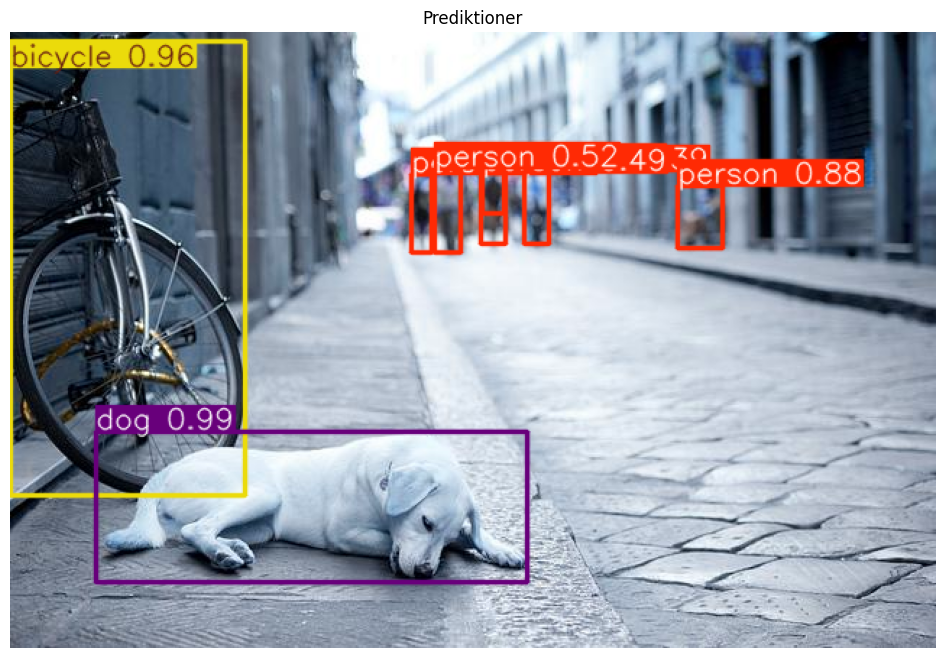

📂 Annoterad bild sparad som: /workspace/test_results/annotated_000000000074.jpg


In [2]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image
import numpy as np

def plot_image_with_predictions(image_path, results, output_dir):
    """Visar en bild med modellens prediktioner och sparar den i output-mappen."""
    if not results or len(results) == 0:
        print(f"⚠️ Inga prediktioner för bilden: {image_path}")
        return

    # Ladda bilden
    image = Image.open(image_path)
    annotated_image = results[0].plot()

    # Visa annoterad bild
    plt.figure(figsize=(12, 8))
    plt.imshow(annotated_image)
    plt.axis("off")
    plt.title("Prediktioner")
    plt.show()

    # Konvertera från numpy.ndarray till PIL-bild
    annotated_image_pil = Image.fromarray(annotated_image)

    # Spara annoterad bild i output-mappen
    annotated_path = os.path.join(output_dir, f"annotated_{os.path.basename(image_path)}")
    annotated_image_pil.save(annotated_path)
    print(f"📂 Annoterad bild sparad som: {annotated_path}")


# Definiera korrekt sökväg till modellen
model_path = "/workspace/my_project/final_training6/weights/best.pt"

# Kontrollera om filen faktiskt finns
absolute_model_path = os.path.abspath(model_path)
print(f"Kontrollerar modellen på: {absolute_model_path}")

if not os.path.isfile(absolute_model_path):
    weights_dir = "/workspace/my_project/final_training6/weights"
    if os.path.exists(weights_dir):
        print("Filer i weights-mappen:", os.listdir(weights_dir))
    raise FileNotFoundError(f"Modellen kunde inte hittas: {absolute_model_path}. Kontrollera sökvägen och träningsresultaten.")

# Ladda modellen
model = YOLO(absolute_model_path)
print("✅ Modell laddad.")

# Skapa mappen för testbilder om den inte finns
test_images_dir = "/workspace/test_images"
os.makedirs(test_images_dir, exist_ok=True)

# Kontrollera om mappen är tom
if not os.listdir(test_images_dir):
    print(f"⚠️ Testbildsmappen är tom: {test_images_dir}")
    print("Ladda upp bilder till denna mapp och kör om koden.")
    exit()

# Hämta testbilder från mappen
test_images = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir) if img.endswith(('.jpg', '.png'))]

# Skapa mappen för resultat om den inte finns
output_dir = "/workspace/test_results"
os.makedirs(output_dir, exist_ok=True)

# Iterera över testbilderna
for image_path in test_images:
    absolute_image_path = os.path.abspath(image_path)
    if not os.path.isfile(absolute_image_path):
        print(f"⚠️ Testbilden hittades inte: {absolute_image_path}")
        continue

    print(f"🔍 Testar bild: {absolute_image_path}")

    results = model(absolute_image_path)
    print(f"📊 Prediktioner: {results[0].boxes}")

    plot_image_with_predictions(absolute_image_path, results, output_dir)